<a href="https://colab.research.google.com/github/garden186/binfo1/blob/master/binfo1_termproj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 생물정보학 및 실습 1 - Term-Project

## Title: Transcriptomic Analysis of OsMYB7 in Response to Salinity Stress 

#Dataset
> Mock_DJ1 / Mock_DJ2

> Mock_M71 / Mock_M72

> Salt_DJ1 / Salt_DJ2

> Salt_M71 / Salt_M72



In [267]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [268]:
!git clone https://github.com/hyeshik/colab-biolab.git
!cd colab-biolab && bash tools/setup.sh
exec(open('colab-biolab/tools/activate_conda.py').read())

fatal: destination path 'colab-biolab' already exists and is not an empty directory.
./
./root/
./root/.bashrc.biolab
./root/.bin.priority/
./root/.bin.priority/pip
./root/.bin.priority/pip2
./root/.bin.priority/pip3
./root/.condarc
./root/.profile
./root/.tmux.conf
tar: ./root: file changed as we read it
./root/.vimrc
PREFIX=/root/conda
Unpacking payload ...
Solving environment: / - \ | / done

# All requested packages already installed.

installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, please verify that your PYTHONPATH only points to
    directories of packages that are compatible with the Python interpreter
    in Miniconda3: /root/conda
Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / 

In [ ]:
!conda install -y subread

Solving environment: | / - \ | / - \ | / - \ | / - \ done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /root/conda/envs/lab

  added / updated specs:
    - subread


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    subread-2.0.1              |       h7132678_2        22.9 MB  bioconda
    ------------------------------------------------------------
                                           Total:        22.9 MB

The following NEW packages will be INSTALLED:

  subread            bioconda/linux-64::subread-2.0.1-h7132678_2



subread-2.0.1        | 22.9 MB   | : 100% 1.0/1 [00:05<00:00,  5.23s/it]               
Preparing transaction: / done
Verifying transaction: \ | / 

#Transcript table

In [416]:
%cd /content/drive/MyDrive/binfo1/termProj/

/content/drive/MyDrive/binfo1/termProj


In [ ]:
!ls -al /content/drive/MyDrive/binfo1/termProj/

total 9825431
-rw------- 1 root root        143 Jun  8 12:51  binfo1_termproj.gslides
drwx------ 2 root root       4096 Jun  3 11:41  colab-biolab
-rw------- 1 root root        451 Jun  8 07:51  fastqc.txt
-rw------- 1 root root        143 Jun  8 11:46 '제목 없는 문서.gdoc'
-rw------- 1 root root       3438 Jun  5 12:20  m7_rseq_analysis.R
-rw------- 1 root root 1139775549 Jun  4 14:43  mock_dj_rep1.bam
-rw------- 1 root root 1290021256 Jun  4 14:38  mock_dj_rep2.bam
-rw------- 1 root root    1717989 Jun  5 14:11  mock_log2count.txt
-rw------- 1 root root 1215408581 Jun  4 14:33  mock_m7_rep1.bam
-rw------- 1 root root 1442331240 Jun  4 14:28  mock_m7_rep2.bam
-rw------- 1 root root    6535338 Jun  6 14:43  read_counts.txt
-rw------- 1 root root        908 Jun  6 14:43  read_counts.txt.summary
-rw------- 1 root root    7082589 Jun  5 11:56  Result_mock.txt
-rw------- 1 root root    7117432 Jun  5 12:58  Result_salt.txt
-rw------- 1 root root 1271076490 Jun  4 14:23  salt_dj_rep1.ba

In [ ]:
!featureCounts -a transcripts.refine.mod.gtf -o read_counts.txt *.bam


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.1

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 8 BAM files                                      ||
||                           o mock_dj_rep1.bam                               ||
||                           o mock_dj_rep2.bam                               ||
||                           o mock_m7_rep1.bam                               ||
||                           o mock_m7_rep2.bam                  

In [270]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from scipy import stats

In [417]:
import seaborn as sns

In [271]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


# Data quality check


In [ ]:
abundances = pd.read_csv('read_counts.txt',sep='\t', comment='#', index_col=0)
abundances

,Chr,Start,End,Strand,Length,mock_dj_rep1.bam,mock_dj_rep2.bam,mock_m7_rep1.bam,mock_m7_rep2.bam,salt_dj_rep1.bam,salt_dj_rep2.bam,salt_m7_rep1.bam,salt_m7_rep2.bam
Geneid,,,,,,,,,,,,,
Os01g0100100,chr01;chr01;chr01;chr01;chr01;chr01;chr01;chr0...,2983;3354;4357;5457;7136;8028;8232;8408;9210;1...,3268;3616;4455;5560;7944;8150;8320;8608;9615;1...,+;+;+;+;+;+;+;+;+;+;+;+,2935,1659,2126,2356,2865,1743,1382,1022,1118
Os01g0100200,chr01;chr01,11218;12152,12060;12435,+;+,1127,0,0,1,0,1,1,0,0
Os01g0100300,chr01;chr01,11372;12146,12042;12284,-;-,810,0,0,0,0,0,0,0,0
Os01g0100400,chr01;chr01;chr01;chr01;chr01,12721;13906;14359;14969;15266,13813;14271;14437;15171;15685,+;+;+;+;+,2161,27,20,30,61,104,62,67,84
Os01g0100466,chr01;chr01,12808;13880,13782;13978,-;-,1074,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Os12g0641200,chr12,27512303,27513696,-,1394,3,2,21,12,4,6,5,11
Os12g0641300,chr12,27512653,27513803,+,1151,66,42,44,44,10,16,20,23
Os12g0641400,chr12;chr12;chr12;chr12;chr12;chr12,27513968;27515336;27515451;27515596;27517526;2...,27514572;27515379;27515514;27516326;27517738;2...,-;-;-;-;-;-,1985,2849,3147,3978,4482,4396,3893,10981,8657


In [ ]:
samples_read = abundances.iloc[:,5:]
samples_read

,mock_dj_rep1.bam,mock_dj_rep2.bam,mock_m7_rep1.bam,mock_m7_rep2.bam,salt_dj_rep1.bam,salt_dj_rep2.bam,salt_m7_rep1.bam,salt_m7_rep2.bam
Geneid,,,,,,,,
Os01g0100100,1659,2126,2356,2865,1743,1382,1022,1118
Os01g0100200,0,0,1,0,1,1,0,0
Os01g0100300,0,0,0,0,0,0,0,0
Os01g0100400,27,20,30,61,104,62,67,84
Os01g0100466,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
Os12g0641200,3,2,21,12,4,6,5,11
Os12g0641300,66,42,44,44,10,16,20,23
Os12g0641400,2849,3147,3978,4482,4396,3893,10981,8657


In [ ]:
lnorm = samples_read.divide(gene_length / 1000, axis=0)
normfactor = lnorm.sum(axis=0) / 1e6
tpm = lnorm.divide(normfactor, axis=1)
tpm.head(5)

,mock_dj_rep1.bam,mock_dj_rep2.bam,mock_m7_rep1.bam,mock_m7_rep2.bam,salt_dj_rep1.bam,salt_dj_rep2.bam,salt_m7_rep1.bam,salt_m7_rep2.bam
Geneid,,,,,,,,
Os01g0100100,28.574160,37.586008,45.030248,45.942624,31.069371,28.756500,18.864677,22.340212
Os01g0100200,0.000000,0.000000,0.049775,0.000000,0.046422,0.054189,0.000000,0.000000
Os01g0100300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Os01g0100400,0.631603,0.480227,0.778760,1.328539,2.517803,1.752157,1.679680,2.279702
Os01g0100466,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
tpm.sum(axis=0)

mock_dj_rep1.bam    1000000.0
mock_dj_rep2.bam    1000000.0
mock_m7_rep1.bam    1000000.0
mock_m7_rep2.bam    1000000.0
salt_dj_rep1.bam    1000000.0
salt_dj_rep2.bam    1000000.0
salt_m7_rep1.bam    1000000.0
salt_m7_rep2.bam    1000000.0
dtype: float64

In [ ]:
mockTpm = tpm.iloc[:,0:4]
saltTpm = tpm.iloc[:,4:8]

In [ ]:
mockTpm.head()

,mock_dj_rep1.bam,mock_dj_rep2.bam,mock_m7_rep1.bam,mock_m7_rep2.bam
Geneid,,,,
Os01g0100100,28.574160,37.586008,45.030248,45.942624
Os01g0100200,0.000000,0.000000,0.049775,0.000000
Os01g0100300,0.000000,0.000000,0.000000,0.000000
Os01g0100400,0.631603,0.480227,0.778760,1.328539
Os01g0100466,0.000000,0.000000,0.000000,0.000000


In [ ]:
saltTpm.head()

,salt_dj_rep1.bam,salt_dj_rep2.bam,salt_m7_rep1.bam,salt_m7_rep2.bam
Geneid,,,,
Os01g0100100,31.069371,28.756500,18.864677,22.340212
Os01g0100200,0.046422,0.054189,0.000000,0.000000
Os01g0100300,0.000000,0.000000,0.000000,0.000000
Os01g0100400,2.517803,1.752157,1.679680,2.279702
Os01g0100466,0.000000,0.000000,0.000000,0.000000


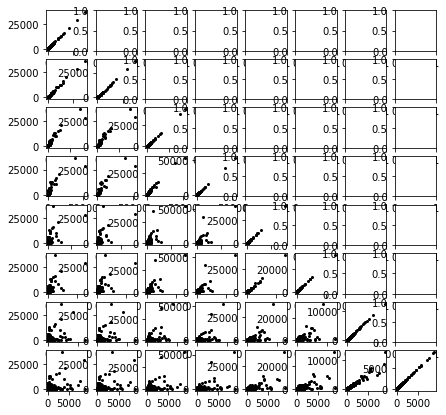

In [ ]:
NSAMPLES = len(tpm.columns)
fig, axes = plt.subplots(NSAMPLES,NSAMPLES,figsize=(7,7))

for i, col1 in enumerate(tpm.columns):
    for j, col2 in enumerate(tpm.columns):
        if i < j: continue
        axes[i,j].scatter(tpm[col1], tpm[col2], c='black', s=4)

In [ ]:
l2mock = np.log2(mockTpm + 1)
l2salt = np.log2(saltTpm + 1)

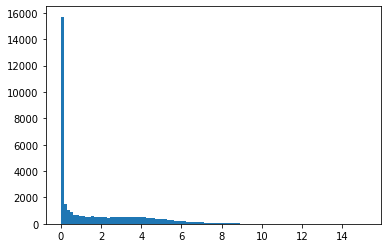

In [ ]:
plt.hist(l2mock['mock_dj_rep1.bam'], bins=100)
None

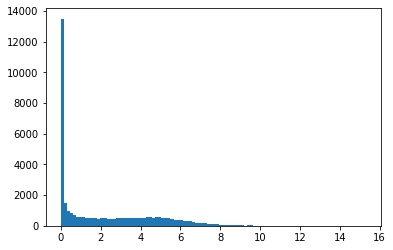

In [ ]:
plt.hist(l2salt['salt_dj_rep1.bam'], bins=100)
None

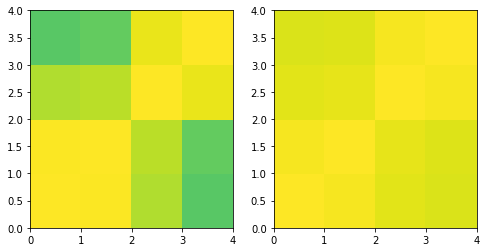

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(8,4))
axes[0].pcolor(mockTpm.corr(), vmin=0.6, vmax=1)
axes[1].pcolor(l2mock.corr(), vmin=0.6, vmax=1)

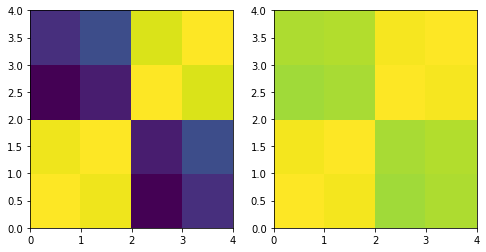

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(8,4))
axes[0].pcolor(saltTpm.corr(), vmin=0.6, vmax=1)
axes[1].pcolor(l2salt.corr(), vmin=0.6, vmax=1)

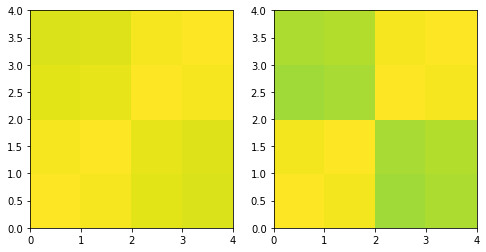

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(8,4))
axes[0].pcolor(l2mock.corr(), vmin=0.6, vmax=1)
axes[1].pcolor(l2salt.corr(), vmin=0.6, vmax=1)

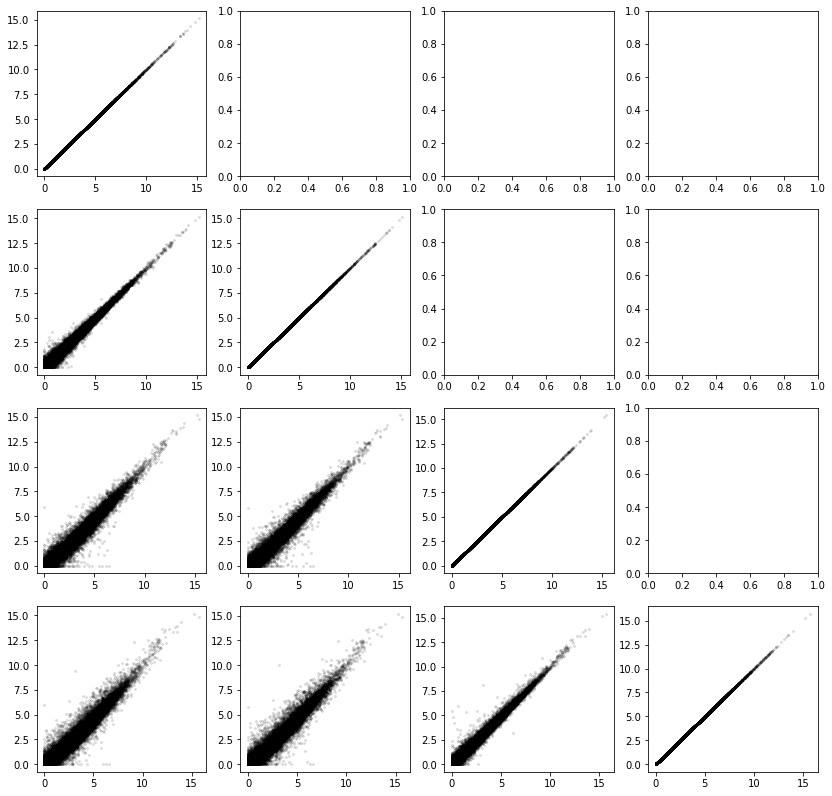

In [ ]:
NSAMPLES = len(mockTpm.columns)
fig, axes = plt.subplots(NSAMPLES,NSAMPLES,figsize=(14,14))

for i, col1 in enumerate(l2mock.columns):
    for j, col2 in enumerate(l2mock.columns):
        if i < j: continue
        axes[i,j].scatter(l2mock[col1], l2mock[col2], c='black', s=4, alpha=0.1, zorder=2)


In [ ]:
mockNames = ['mock_WT1','mock_WT2','mock_M7-1','mock_M7-2']
saltNames = ['salt_WT1','salt_WT2','salt_M7-1','salt_M7-2']

mockCrr = mockTpm.corr()
mockCrr.columns = mockNames

In [ ]:
saltCrr = saltTpm.corr()
saltCrr.columns = saltNames

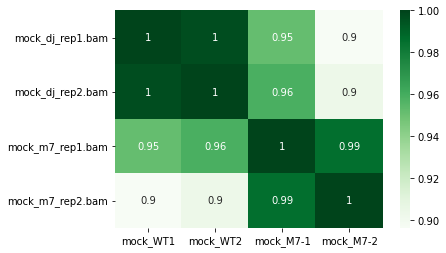

In [ ]:
import seaborn as sns


sns.heatmap(mockCrr,annot=True, cmap='Greens')
plt.show()

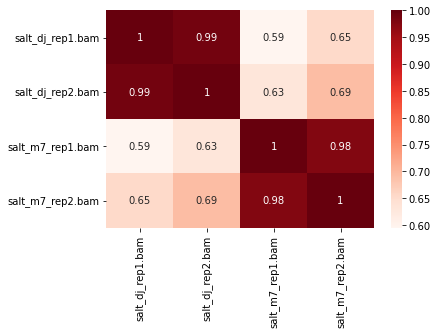

In [ ]:
sns.heatmap(saltCrr,annot=True, cmap='Reds')
plt.show()

In [ ]:
mockTpm.head()

,mock_dj_rep1.bam,mock_dj_rep2.bam,mock_m7_rep1.bam,mock_m7_rep2.bam
Geneid,,,,
Os01g0100100,28.574160,37.586008,45.030248,45.942624
Os01g0100200,0.000000,0.000000,0.049775,0.000000
Os01g0100300,0.000000,0.000000,0.000000,0.000000
Os01g0100400,0.631603,0.480227,0.778760,1.328539
Os01g0100466,0.000000,0.000000,0.000000,0.000000


In [ ]:
abundMod = pd.read_csv('readCounts_mod.csv', sep=',', index_col=0, comment='"') # read count가 0인 값 제거한 파일
mockRead_mod = abundMod.iloc[:,5:9]
mockRead_mod.to_csv('mockRead_mod.csv')
saltRead_mod.to_csv('saltRead_mod.csv')
mockRead_mod

,mock_dj_rep1.bam,mock_dj_rep2.bam,mock_m7_rep1.bam,mock_m7_rep2.bam
Geneid,,,,
Os01g0100100,1659,2126,2356,2865
Os01g0100400,27,20,30,61
Os01g0100500,690,720,1090,1257
Os01g0100600,284,341,351,415
Os01g0100700,1529,1456,940,1230
...,...,...,...,...
Os12g0641100,1846,1631,2865,3611
Os12g0641200,3,2,21,12
Os12g0641300,66,42,44,44


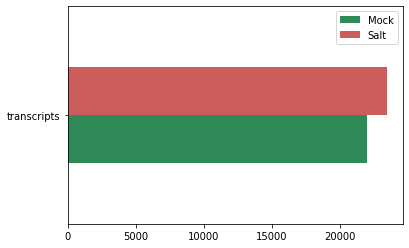

In [ ]:
transcripts = pd.DataFrame({'Mock':[22008],
                   'Salt':[23473]},
                   index=['transcripts'])
transcripts.transpose()
transcripts.plot(kind='barh', color=['seagreen','indianred'], width=0.4)

# Data Normalization
1. Raw data
2. log2(CPM+1)
3. TMM Normalization


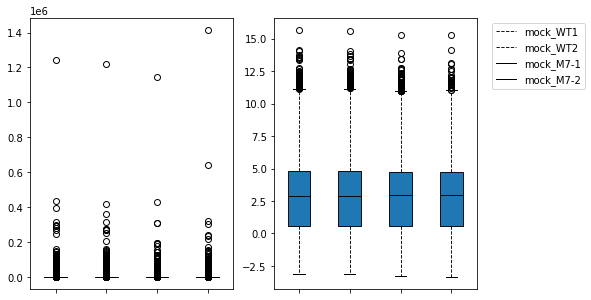

In [ ]:
mockMod = pd.read_csv('Result_mock_mod.txt', sep='\t', comment='#', index_col=0)

nrow = 1
ncol = 2
fig, axes = plt.subplots(nrow, ncol, figsize=(8,5))

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False

mockNames = ['mock_WT1','mock_WT2','mock_M7-1','mock_M7-2']

# mock
mockRead = mockMod.iloc[:,9:13]
#lg2Mock = np.log2(mockRead/1e6 + 1)
mockTMM = mockMod.iloc[:,5:9]
mockTMM.columns = mockNames

dfList = [mockRead, mockTMM]
boxprops = dict(color="black", linewidth=0.9)
medianprops = dict(color='black', linewidth=0.9)

# boxplot

for r in range(len(dfList)):
  dfList[r].boxplot(ax=axes[r], color='black', patch_artist=True, boxprops=boxprops, medianprops=medianprops, whiskerprops=dict(linestyle='--', linewidth=0.9))
  axes[r].grid(b=False)
  axes[r].xaxis.set_ticklabels([])

axes[1].legend(list(mockTMM.columns), bbox_to_anchor=(1.05,1.0), loc='upper left')

plt.show()

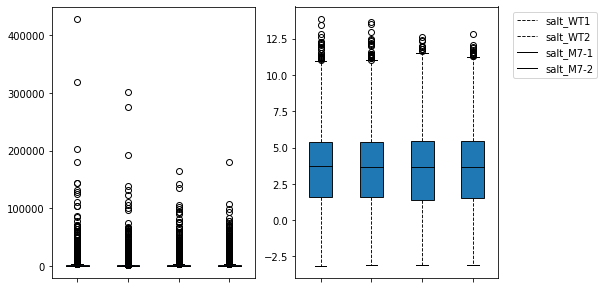

In [ ]:
mockMod = pd.read_csv('Result_salt_mod.txt', sep='\t', comment='#', index_col=0)

nrow = 1
ncol = 2
fig, axes = plt.subplots(nrow, ncol, figsize=(8,5))

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False

mockNames = ['salt_WT1','salt_WT2','salt_M7-1','salt_M7-2']

# salt
saltRead = saltMod.iloc[:,9:13]
#lg2Mock = np.log2(mockRead/1e6 + 1)
saltTMM = saltMod.iloc[:,5:9]
saltTMM.columns = saltNames

dfList = [saltRead, saltTMM]
boxprops = dict(color="black", linewidth=0.9)
medianprops = dict(color='black', linewidth=0.9)

# boxplot

for r in range(len(dfList)):
  dfList[r].boxplot(ax=axes[r], color='black', patch_artist=True, boxprops=boxprops, medianprops=medianprops, whiskerprops=dict(linestyle='--', linewidth=0.9))
  axes[r].grid(b=False)
  axes[r].xaxis.set_ticklabels([])

axes[1].legend(list(saltTMM.columns), bbox_to_anchor=(1.05,1.0), loc='upper left')

plt.show()

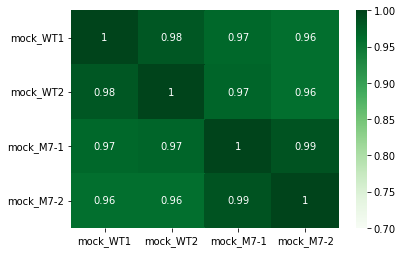

In [ ]:
sns.heatmap(mockTMM.corr(),annot=True, cmap="Greens", vmin=0.7)

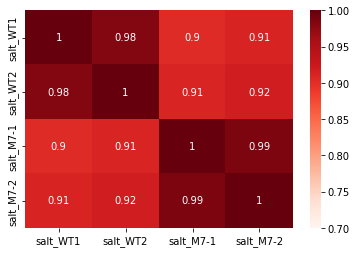

In [ ]:
sns.heatmap(saltTMM.corr(),annot=True, cmap='Reds', vmin=0.)

# Expression dataset
1. Gprofiler
2. KEGG


In [ ]:
mock = pd.read_csv('Result_mock_mod.txt',sep='\t', comment='#', index_col=0)
salt = pd.read_csv('Result_salt_mod.txt',sep='\t', comment='#', index_col=0)

In [ ]:
mock.head()

,logFC,logCPM,LR,PValue,FDR,TMMValue_mock_dj_rep1,TMMValue_mock_dj_rep2,TMMValue_mock_m7_rep1,TMMValue_mock_m7_rep2,RawCount_mock_dj_rep1,RawCount_mock_dj_rep2,RawCount_mock_m7_rep1,RawCount_mock_m7_rep2
genes,,,,,,,,,,,,,
Os01g0100100,0.036860,6.319109,0.059890,8.066692e-01,8.915581e-01,6.129110,6.453453,6.376294,6.297575,1659,2126,2356,2865
Os01g0100400,0.485735,0.328811,1.098965,2.944933e-01,4.917229e-01,0.273627,-0.160607,0.173493,0.802556,27,20,30,61
Os01g0100500,0.310353,5.045003,4.766276,2.902254e-02,9.635361e-02,4.865515,4.893658,5.265712,5.110687,690,720,1090,1257
Os01g0100600,-0.132703,3.643500,0.467445,4.941649e-01,6.750912e-01,3.589816,3.819252,3.636513,3.517879,284,341,351,415
Os01g0100700,-0.895675,5.577154,42.674090,6.466315e-11,3.183684e-09,6.011508,5.907859,5.052541,5.079425,1529,1456,940,1230


In [419]:
salt.head()

,logFC,logCPM,LR,PValue,FDR,TMMValue_salt_dj_rep1,TMMValue_salt_dj_rep2,TMMValue_salt_m7_rep1,TMMValue_salt_m7_rep2,RawCount_salt_dj_rep1,RawCount_salt_dj_rep2,RawCount_salt_m7_rep1,RawCount_salt_m7_rep2
genes,,,,,,,,,,,,,
Os01g0100100,-0.496407,5.669902,11.807490,0.000590,0.001756,5.931591,5.859780,5.315593,5.481175,1743,1382,1022,1118
Os01g0100400,-0.072153,1.646552,0.044549,0.832836,0.877734,1.893263,1.421861,1.423983,1.777281,104,62,67,84
Os01g0100500,0.260529,6.072673,3.698057,0.054476,0.097256,5.972343,5.899876,6.165003,6.228439,1793,1421,1843,1878
Os01g0100600,-0.398000,3.636614,3.700658,0.054391,0.097146,3.702399,3.932500,3.544389,3.294148,370,362,298,244
Os01g0100700,0.106605,6.234649,0.467211,0.494273,0.595502,5.999411,6.342569,6.206622,6.363153,1827,1932,1897,2062


In [420]:
mUp = (mock.PValue < 0.05) & (mock.FDR < 0.05) & (mock.logFC >= 2)
mDown = (mock.PValue < 0.05) & (mock.FDR < 0.05) & (mock.logFC <= -2)

lg2mock_up = np.log2(mock[mUp].iloc[:,9:13])
lg2mock_down = np.log2(mock[mDown].iloc[:,9:13])
lg2mock_fc = pd.concat([lg2mock_up, lg2mock_down], axis=0)

#lg2mock_up.to_csv('mockUp.csv')
#lg2mock_down.to_csv('mockDown.csv')

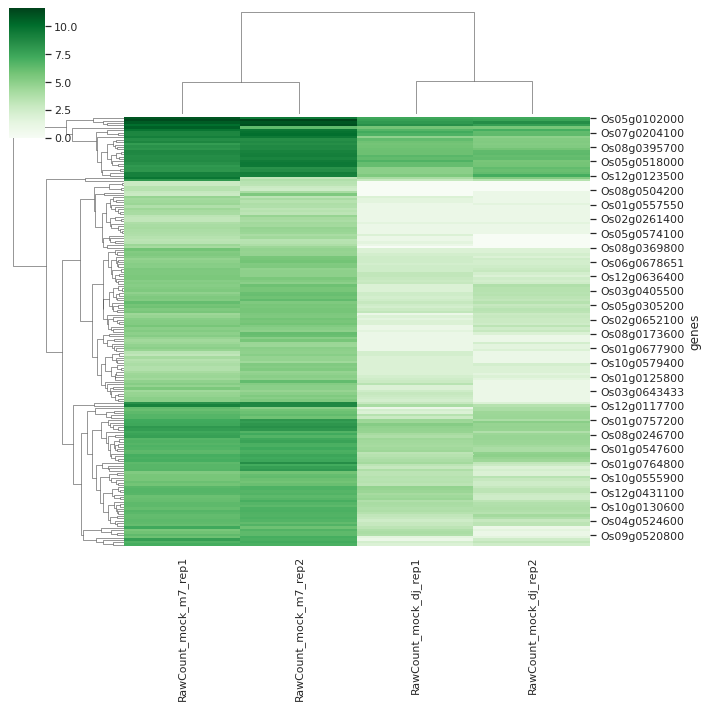

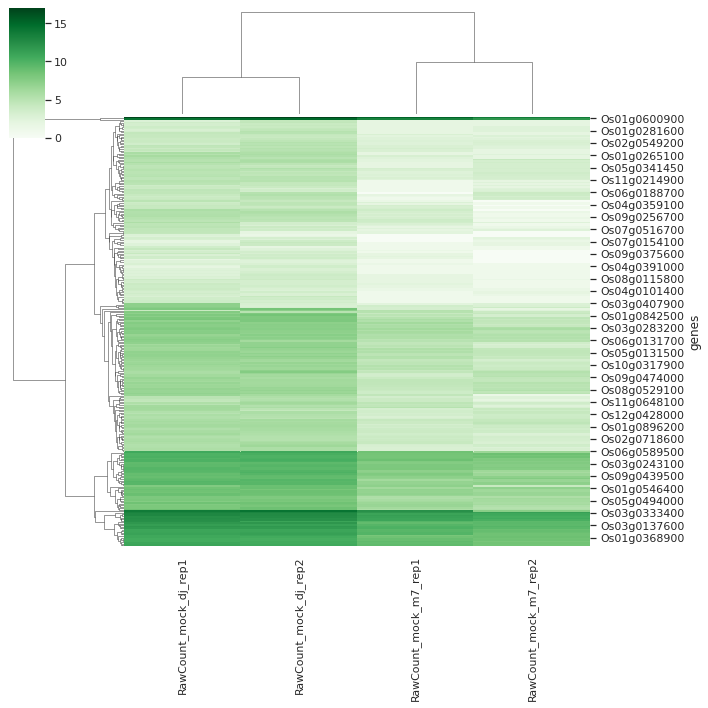

In [422]:
clusterMockUp = sns.clustermap(lg2mock_up, cmap="Greens")
clusterMockdown = sns.clustermap(lg2mock_down, cmap="Greens")

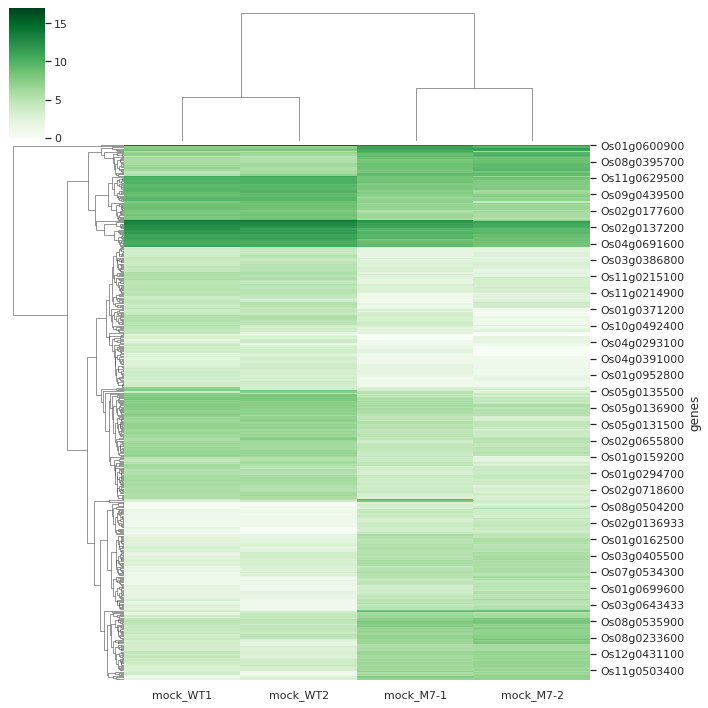

In [423]:
mockNames = ['mock_WT1','mock_WT2','mock_M7-1','mock_M7-2']
lg2mock_fc.columns = mockNames
sns.clustermap(lg2mock_fc, cmap="Greens")

In [ ]:
salt.head()

,logFC,logCPM,LR,PValue,FDR,TMMValue_salt_dj_rep1,TMMValue_salt_dj_rep2,TMMValue_salt_m7_rep1,TMMValue_salt_m7_rep2,RawCount_salt_dj_rep1,RawCount_salt_dj_rep2,RawCount_salt_m7_rep1,RawCount_salt_m7_rep2
genes,,,,,,,,,,,,,
Os01g0100100,-0.535332,5.659611,13.552212,0.000232,0.001237,5.918129,5.886060,5.273225,5.456736,1744,1383,1023,1119
Os01g0100200,-0.910864,-2.897558,0.669513,0.413222,0.703611,-2.776528,-2.625061,-3.127681,-3.109498,2,2,1,1
Os01g0100300,0.006483,-3.119950,0.000026,0.995966,0.998724,-3.167297,-3.066227,-3.127681,-3.109498,1,1,1,1
Os01g0100400,-0.106990,1.649022,0.092908,0.760513,0.998724,1.892470,1.468427,1.401725,1.768456,105,63,68,85
Os01g0100466,0.006483,-3.119950,0.000026,0.995966,0.998724,-3.167297,-3.066227,-3.127681,-3.109498,1,1,1,1


In [ ]:
sUp = (salt.PValue < 0.05) & (salt.FDR < 0.05) & (salt.logFC >= 2)
sDown = (salt.PValue < 0.05) & (salt.FDR < 0.05) & (salt.logFC <= -2)
cntSUp = np.log2(salt[sUp].iloc[:,9:13])
cntSDown = np.log2(salt[sDown].iloc[:,9:13])
cntSFc = pd.concat([cntSUp, cntSDown], axis=0)
cntSUp.to_csv('saltUp.csv')
cntSDown.to_csv('saltDown.csv')

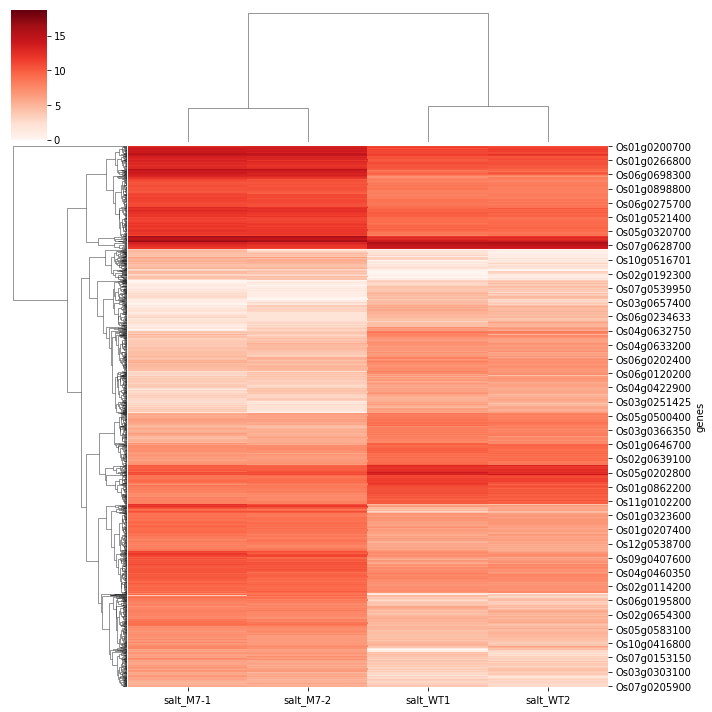

In [ ]:
saltNames = ['salt_WT1','salt_WT2','salt_M7-1','salt_M7-2']
cntSFc.columns = saltNames
cntSFc.head()
sns.clustermap(cntSFc, cmap="Reds")

#GO Enrichment analysis

##g:Profiler

In [359]:
md = pd.read_csv('m7MockDown.csv',sep=',', comment='#', index_col=0)
su = pd.read_csv('m7SaltUp.csv',sep=',', comment='#', index_col=0)
sd = pd.read_csv('m7SaltDown.csv',sep=',', comment='#', index_col=0)

In [407]:
md.reset_index(inplace=True)

In [408]:
md.head()

,source,term_name,term_id,adjusted_p_value,negative_log10_of_adjusted_p_value,term_size,query_size,intersection_size,gene_ratio,effective_domain_size,intersections
0,KEGG,"Phenylalanine, tyrosine and tryptophan biosynt...",KEGG:00400,0.041498,1.381978,38,45,4,0.088889,3442,"OS03G0389700,OS04G0406600,OS06G0542200,OS07G06..."
1,GO:BP,plant-type cell wall organization or biogenesis,GO:0071669,0.040021,1.397708,151,150,8,0.053333,16775,"OS01G0159200,OS01G0750300,OS03G0184300,OS03G04..."
2,GO:BP,secondary metabolite biosynthetic process,GO:0044550,0.022550,1.646852,102,150,7,0.046667,16775,"OS01G0291500,OS01G0952800,OS02G0187800,OS02G06..."
3,GO:CC,plastid envelope,GO:0009526,0.010006,1.999732,506,161,15,0.093168,17654,"OS01G0246400,OS01G0600900,OS01G0720500,OS01G08..."
4,GO:BP,photosynthesis,GO:0015979,0.009073,2.042251,203,150,10,0.066667,16775,"OS01G0600900,OS01G0720500,OS01G0791033,OS03G03..."


In [409]:
md_sorted = (md['term_size'] <= 500) & (md['term_size'] >= 10)
md = md[md_sorted]
md = md.sort_values(by='gene_ratio', ascending=False)
md.head()

,source,term_name,term_id,adjusted_p_value,negative_log10_of_adjusted_p_value,term_size,query_size,intersection_size,gene_ratio,effective_domain_size,intersections
15,KEGG,Phenylpropanoid biosynthesis,KEGG:00940,0.001449,2.839068,136,45,9,0.200000,3442,"OS01G0294700,OS02G0177600,OS02G0187800,OS02G06..."
0,KEGG,"Phenylalanine, tyrosine and tryptophan biosynt...",KEGG:00400,0.041498,1.381978,38,45,4,0.088889,3442,"OS03G0389700,OS04G0406600,OS06G0542200,OS07G06..."
12,KEGG,Flavonoid biosynthesis,KEGG:00941,0.003234,2.490212,20,45,4,0.088889,3442,"OS04G0101400,OS05G0494000,OS10G0317900,OS11G05..."
10,GO:CC,thylakoid,GO:0009579,0.003700,2.431840,355,161,13,0.080745,17654,"OS01G0246400,OS01G0600900,OS01G0720500,OS03G03..."
20,GO:BP,secondary metabolic process,GO:0019748,0.000270,3.568433,211,150,12,0.080000,16775,"OS01G0291500,OS01G0820000,OS01G0842500,OS01G09..."


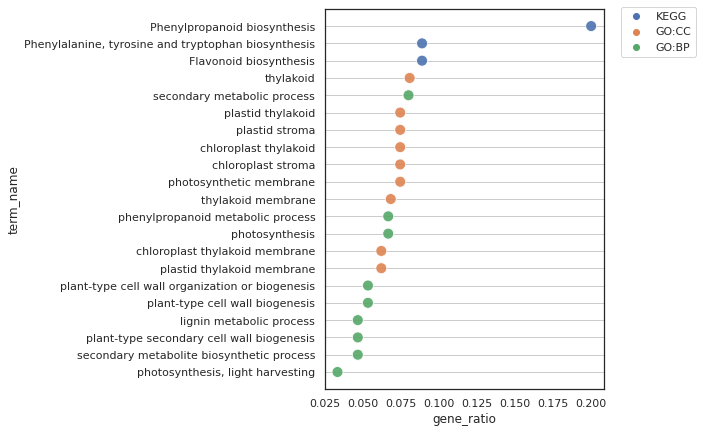

In [415]:
# GO terms - mock_downreg

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,7))
groups = md.groupby('source')

md_plot = sns.scatterplot(x='gene_ratio',
                y='term_name',
                hue='source',
                data=md,
                alpha=0.9,
                s=120,
                legend='brief')

md_plot.legend(loc='right', bbox_to_anchor=(1.35, 0.94), ncol=1)
sns.set_style("white")
plt.grid(True, axis='y')

In [363]:
su.rename(columns={"Unnamed: 8":"gene_ratio"}, inplace=True)

In [365]:
su.head()

,term_name,term_id,adjusted_p_value,negative_log10_of_adjusted_p_value,term_size,query_size,intersection_size,gene_ratio,effective_domain_size,intersections
source,,,,,,,,,,
GO:MF,glucosidase activity,GO:0015926,0.006468,2.189248,91,564,12,0.021277,18761,"OS01G0130400,OS02G0106100,OS02G0139300,OS03G02..."
GO:MF,"hydrolase activity, hydrolyzing O-glycosyl com...",GO:0004553,0.010383,1.983676,418,564,29,0.051418,18761,"OS01G0130400,OS01G0860800,OS01G0875500,OS02G01..."
GO:MF,amino acid transmembrane transporter activity,GO:0015171,0.026451,1.577555,89,564,11,0.019504,18761,"OS01G0225000,OS01G0266800,OS01G0597600,OS01G08..."
GO:MF,hydrolase activity,GO:0016787,0.029172,1.535040,3106,564,128,0.226950,18761,"OS01G0128200,OS01G0130400,OS01G0132000,OS01G01..."
GO:MF,"phosphatidylinositol-3,4,5-trisphosphate 5-pho...",GO:0034485,0.029418,1.531386,16,564,5,0.008865,18761,"OS01G0183300,OS01G0814200,OS03G0626500,OS05G05..."


In [367]:
su_sorted = (su['term_size'] <= 500) & (su['term_size'] >= 10)
su = su[su_sorted]
su = su.sort_values(by='gene_ratio', ascending=False)
su.head()

,term_name,term_id,adjusted_p_value,negative_log10_of_adjusted_p_value,term_size,query_size,intersection_size,gene_ratio,effective_domain_size,intersections
source,,,,,,,,,,
GO:BP,response to temperature stimulus,GO:0009266,3.620000e-07,6.441738,269,497,30,0.060362,16775,"OS01G0571300,OS01G0840100,OS02G0181900,OS02G05..."
GO:MF,"hydrolase activity, hydrolyzing O-glycosyl com...",GO:0004553,1.038302e-02,1.983676,418,564,29,0.051418,18761,"OS01G0130400,OS01G0860800,OS01G0875500,OS02G01..."
GO:BP,response to inorganic substance,GO:0010035,3.382241e-02,1.470795,285,497,22,0.044266,16775,"OS01G0170000,OS01G0278000,OS01G0960200,OS02G06..."
GO:BP,response to heat,GO:0009408,4.361290e-06,5.360385,154,497,21,0.042254,16775,"OS01G0571300,OS01G0840100,OS02G0181900,OS02G05..."
GO:BP,response to osmotic stress,GO:0006970,1.418144e-02,1.848280,175,497,17,0.034205,16775,"OS01G0225000,OS01G0278000,OS02G0661100,OS02G07..."


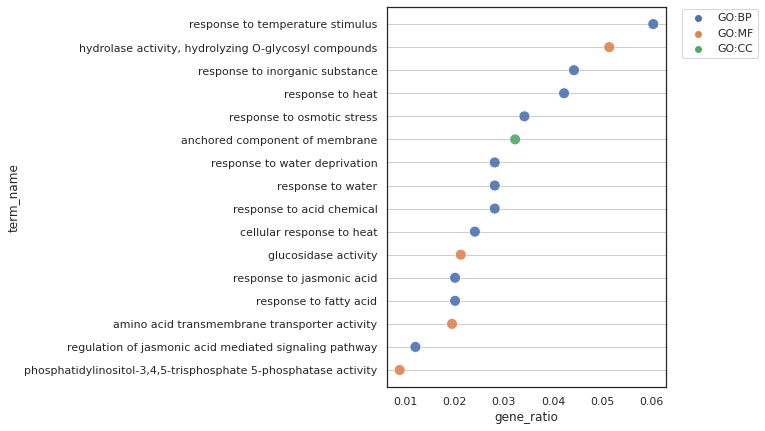

In [404]:
# GO terms - salt_upreg 

plt.figure(figsize=(5,7))
groups = su.groupby('source')

su_plot = sns.scatterplot(x='gene_ratio',
                y='term_name',
                hue='source',
                data=su,
                alpha=0.9,
                s=120,
                legend='brief')

su_plot.legend(loc='right', bbox_to_anchor=(1.35, 0.93), ncol=1)
sns.set_style("white")
plt.grid(True, axis='y')

In [377]:
sd.head()

,term_name,term_id,adjusted_p_value,negative_log10_of_adjusted_p_value,term_size,query_size,intersection_size,gene_ratio,effective_domain_size,intersections
source,,,,,,,,,,
GO:MF,chlorophyll binding,GO:0016168,1.450000e-10,9.839032,19,359,10,0.027855,18761,"OS01G0600900,OS01G0720500,OS03G0592500,OS04G04..."
GO:MF,protein serine/threonine kinase activity,GO:0004674,1.363130e-05,4.865462,1079,359,48,0.133705,18761,"OS01G0364400,OS01G0364800,OS01G0668600,OS01G06..."
GO:MF,protein kinase activity,GO:0004672,5.071470e-05,4.294867,1380,359,55,0.153203,18761,"OS01G0115600,OS01G0117000,OS01G0117700,OS01G03..."
GO:MF,polysaccharide binding,GO:0030247,1.443260e-04,3.840655,160,359,15,0.041783,18761,"OS01G0115600,OS01G0117000,OS01G0137200,OS01G03..."
GO:MF,"phosphotransferase activity, alcohol group as ...",GO:0016773,1.537490e-04,3.813189,1542,359,58,0.161560,18761,"OS01G0102600,OS01G0115600,OS01G0117000,OS01G01..."


In [387]:
sd_sorted = (sd['term_size'] <= 500) & (sd['term_size'] >= 10)
sd = sd[sd_sorted]
sd = sd.sort_values(by='gene_ratio', ascending=False)
sd

,term_name,term_id,adjusted_p_value,negative_log10_of_adjusted_p_value,term_size,query_size,intersection_size,gene_ratio,effective_domain_size,intersections
source,,,,,,,,,,
KEGG,Photosynthesis,KEGG:00195,2.760000e-15,14.558632,41,64,15,0.234375,3442,"OS01G0501800,OS01G0773700,OS01G0869800,OS03G03..."
GO:CC,thylakoid,GO:0009579,7.030000e-25,24.152953,355,353,49,0.138810,17654,"OS01G0278900,OS01G0501800,OS01G0600900,OS01G07..."
GO:CC,photosynthetic membrane,GO:0034357,2.360000e-24,23.627717,283,353,44,0.124646,17654,"OS01G0278900,OS01G0501800,OS01G0600900,OS01G07..."
GO:CC,thylakoid membrane,GO:0042651,1.060000e-22,21.975735,262,353,41,0.116147,17654,"OS01G0278900,OS01G0501800,OS01G0600900,OS01G07..."
GO:BP,photosynthesis,GO:0015979,2.820000e-23,22.549059,203,335,38,0.113433,16775,"OS01G0501800,OS01G0600900,OS01G0720500,OS01G07..."
GO:CC,plastid thylakoid,GO:0031976,4.860000e-20,19.313203,273,353,39,0.110482,17654,"OS01G0278900,OS01G0600900,OS01G0720500,OS01G07..."
GO:CC,chloroplast thylakoid,GO:0009534,4.860000e-20,19.313203,273,353,39,0.110482,17654,"OS01G0278900,OS01G0600900,OS01G0720500,OS01G07..."
GO:CC,plastid membrane,GO:0042170,2.390000e-12,11.621603,365,353,35,0.099150,17654,"OS01G0278900,OS01G0600900,OS01G0720500,OS01G07..."
GO:CC,plastid thylakoid membrane,GO:0055035,6.700000e-19,18.173741,228,353,35,0.099150,17654,"OS01G0278900,OS01G0600900,OS01G0720500,OS01G07..."


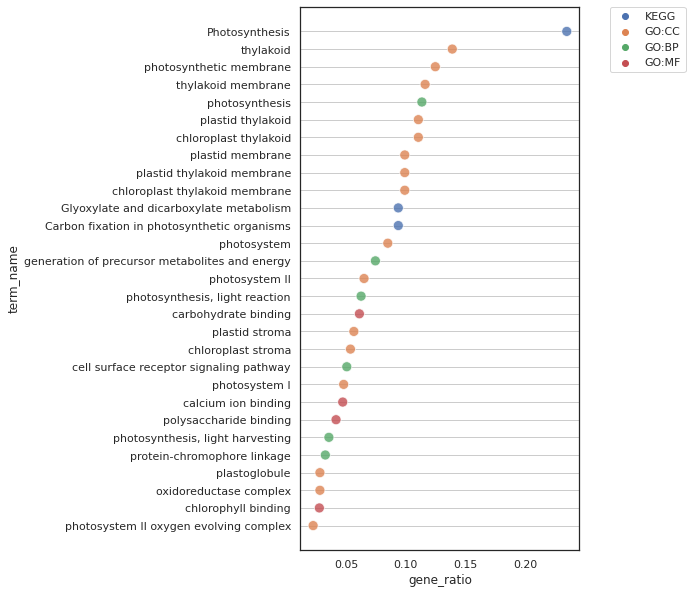

In [396]:
# GO terms - salt_downreg 

plt.figure(figsize=(5,10))
groups = su.groupby('source')

sd_plot = sns.scatterplot(x='gene_ratio',
                y='term_name',
                hue='source',
                data=sd,
                alpha=0.8,
                s=100,
                legend='brief')

sd_plot.legend(loc='right', bbox_to_anchor=(1.4, 0.94), ncol=1)
sns.set_style("white")
plt.grid(True, axis='y')
